In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler



In [62]:
data = pd.read_csv('./data/data_train.csv')
data

,grupo,btsId,btsNetNome,lat_x,lon_x,cch,azimuth,RssiId,ponto_id,delay_1,delay_2,delay_3,lat_y,lon_y,indoor,rssi_id,rssi_value
0,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,6604,5.0,3.0,2.0,-8.055786,-34.951505,True,rssi_1_1,-103.705000
1,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5515,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_1_1,-105.225000
2,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,5049,5.0,3.0,2.0,-8.055506,-34.951693,True,rssi_1_1,-102.610000
3,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,8737,4.0,7.0,2.0,-8.050390,-34.959630,False,rssi_1_1,-89.140000
4,1,BTS_1_1,PEMDL01_1,-8.04342,-34.9520,873,0,rssi_1_1,1203,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_1_1,-109.088333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60380,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5734,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60381,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5191,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60382,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,5390,5.0,3.0,2.0,-8.055784,-34.951608,True,rssi_3_3,-108.120000
60383,3,BTS_3_3,PEMDL09_3,-8.05532,-34.9579,869,240,rssi_3_3,860,5.0,3.0,2.0,-8.055380,-34.951736,True,rssi_3_3,-115.000000


In [63]:
fingerprint_features = ["rssi_value", "delay_1", "delay_2", "delay_3", "lon_y", "lat_y"]

fingerprint = data.copy()
fingerprint = fingerprint[fingerprint_features]

fingerprint

,rssi_value,delay_1,delay_2,delay_3,lon_y,lat_y
0,-103.705000,5.0,3.0,2.0,-34.951505,-8.055786
1,-105.225000,5.0,3.0,2.0,-34.951608,-8.055784
2,-102.610000,5.0,3.0,2.0,-34.951693,-8.055506
3,-89.140000,4.0,7.0,2.0,-34.959630,-8.050390
4,-109.088333,5.0,3.0,2.0,-34.951736,-8.055380
...,...,...,...,...,...,...
60380,-108.120000,5.0,3.0,2.0,-34.951608,-8.055784
60381,-108.120000,5.0,3.0,2.0,-34.951608,-8.055784
60382,-108.120000,5.0,3.0,2.0,-34.951608,-8.055784
60383,-115.000000,5.0,3.0,2.0,-34.951736,-8.055380


In [73]:
sampled_data = fingerprint.sample(frac=0.1, random_state=42)

X = sampled_data.drop(columns=["lon_y", "lat_y"])
Y = sampled_data[[ "lon_y", "lat_y"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)


In [74]:
import math
def magnitude_vector(v):
    return math.sqrt(sum(i * j for i, j in zip(v, v)))

def distancia_euclidiana(v, df_vector):
    return magnitude_vector([i - j for i, j in zip(v, df_vector)])

def fingerprinting(df, v):
    df['distancia'] = [distancia_euclidiana(list(df_v), list(v)) for df_v in df.values.tolist()]
    df = df.sort_values(by='distancia', ascending=True)
    df = df.reset_index()
    return df.loc[0, ['lat_y', 'lon_y']]


In [75]:
full_df = X_train.copy()
full_df['lat_y'] = Y_train['lat_y']
full_df['lon_y'] = Y_train['lon_y']
Y_pred = [list(fingerprinting(full_df,values)) for _,values in X_test.iterrows()]

In [77]:
compare_df = Y_test.copy()
compare_df['lat_pred'] = [lat for lat,_ in Y_pred]
compare_df['lon_pred'] = [lon for _,lon in Y_pred]
compare_df['lat_diferenca'] = compare_df['lat_y'] - compare_df['lat_pred']
compare_df['lon_diferenca'] = compare_df['lon_y'] - compare_df['lon_pred']
compare_df.describe()


,lon_y,lat_y,lat_pred,lon_pred,lat_diferenca,lon_diferenca
count,604.000000,604.000000,604.000000,604.000000,604.000000,604.000000
mean,-34.951623,-8.054503,-8.054484,-34.951613,-0.000019,-0.000010
std,0.002204,0.002382,0.002335,0.002163,0.000442,0.000411
min,-34.959850,-8.059360,-8.059230,-34.959780,-0.002410,-0.003950
25%,-34.951728,-8.055698,-8.055684,-34.951736,-0.000126,0.000000
50%,-34.951597,-8.055500,-8.055424,-34.951608,0.000000,0.000000
75%,-34.951331,-8.055377,-8.055380,-34.951331,0.000000,0.000008
max,-34.945120,-8.046420,-8.046420,-34.945140,0.004330,0.002260


In [82]:
conversao_metro = 30.87 * 1000
compare_df['lat_diferenca_metros'] = compare_df['lat_diferenca']*conversao_metro
compare_df['lon_diferenca_metros'] = compare_df['lon_diferenca']*conversao_metro
compare_df['diferenca_metros'] = [math.sqrt(lat_dif**2+lon_diff**2) for lat_dif,lon_diff in zip(compare_df['lat_diferenca_metros'],compare_df['lon_diferenca_metros'])]

print(f"Média de erro: {compare_df['diferenca_metros'].mean():.2f} metros")
print(f"Mínimo de erro: {compare_df['diferenca_metros'].min():.2f} metros")
print(f"Máximo de erro: {compare_df['diferenca_metros'].max():.2f} metros")
print(f"Desvio padrão dos erros: {compare_df['diferenca_metros'].std():.2f} metros")


Média de erro: 8.58 metros
Mínimo de erro: 0.00 metros
Máximo de erro: 151.45 metros
Desvio padrão dos erros: 16.56 metros


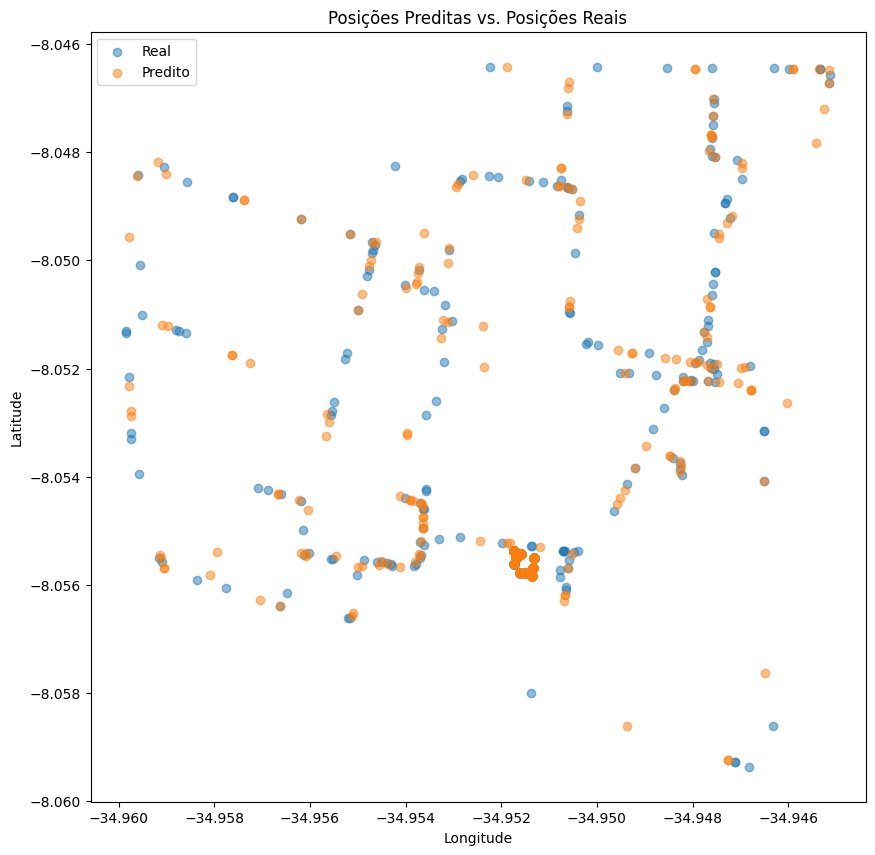

In [84]:
Y_pred_np = np.array(Y_pred)
plt.figure(figsize=(10, 10))
plt.scatter(Y_test['lon_y'], Y_test['lat_y'], label='Real', alpha=0.5)
plt.scatter(Y_pred_np[:, 1], Y_pred_np[:, 0], label='Predito', alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Posições Preditas vs. Posições Reais')
plt.legend()
plt.show()
